In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'db_two_cleaned.csv'
data_2 = pd.read_csv(file_path)
data = data_2

# Seasonal Trends Over The Years 2023-2024

In [3]:
# Clean up column names by stripping leading/trailing spaces
data.columns = data.columns.str.strip()

# Convert 'DATE OF OCCURRENCE' to datetime
data['DATE_OF_OCCURRENCE'] = pd.to_datetime(
    data['DATE  OF OCCURRENCE'],  # Now safe to use
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

# Extract necessary temporal features
data['Month'] = data['DATE_OF_OCCURRENCE'].dt.month
data['Year'] = data['DATE_OF_OCCURRENCE'].dt.year

# Map months to seasons
data['Season'] = data['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Group by season and primary crime description to get crime counts by season
seasonal_trends = data.groupby(['Season', 'PRIMARY DESCRIPTION']).size().reset_index(name='Crime Count')

# Pivot for easier visualization
seasonal_trends_pivot = seasonal_trends.pivot(index='PRIMARY DESCRIPTION', columns='Season', values='Crime Count').fillna(0)

# Display the trends
print(seasonal_trends_pivot)


Season                                Fall   Spring   Summer   Winter
PRIMARY DESCRIPTION                                                  
ARSON                                112.0    125.0    132.0    123.0
ASSAULT                             5889.0   6140.0   6230.0   5248.0
BATTERY                            11263.0  11912.0  12307.0  10284.0
BURGLARY                            2347.0   1956.0   2158.0   1716.0
CONCEALED CARRY LICENSE VIOLATION     47.0     44.0     67.0     43.0
CRIMINAL DAMAGE                     7021.0   7119.0   7755.0   6743.0
CRIMINAL SEXUAL ASSAULT              352.0    360.0    461.0    347.0
CRIMINAL TRESPASS                   1259.0   1199.0   1282.0   1144.0
DECEPTIVE PRACTICE                  3035.0   3765.0   3620.0   3597.0
GAMBLING                               8.0      7.0      5.0      1.0
HOMICIDE                             136.0    144.0    190.0    105.0
HUMAN TRAFFICKING                      1.0      1.0      0.0      1.0
INTERFERENCE WITH PU

# Seasonal Crime Trends Plot By Type

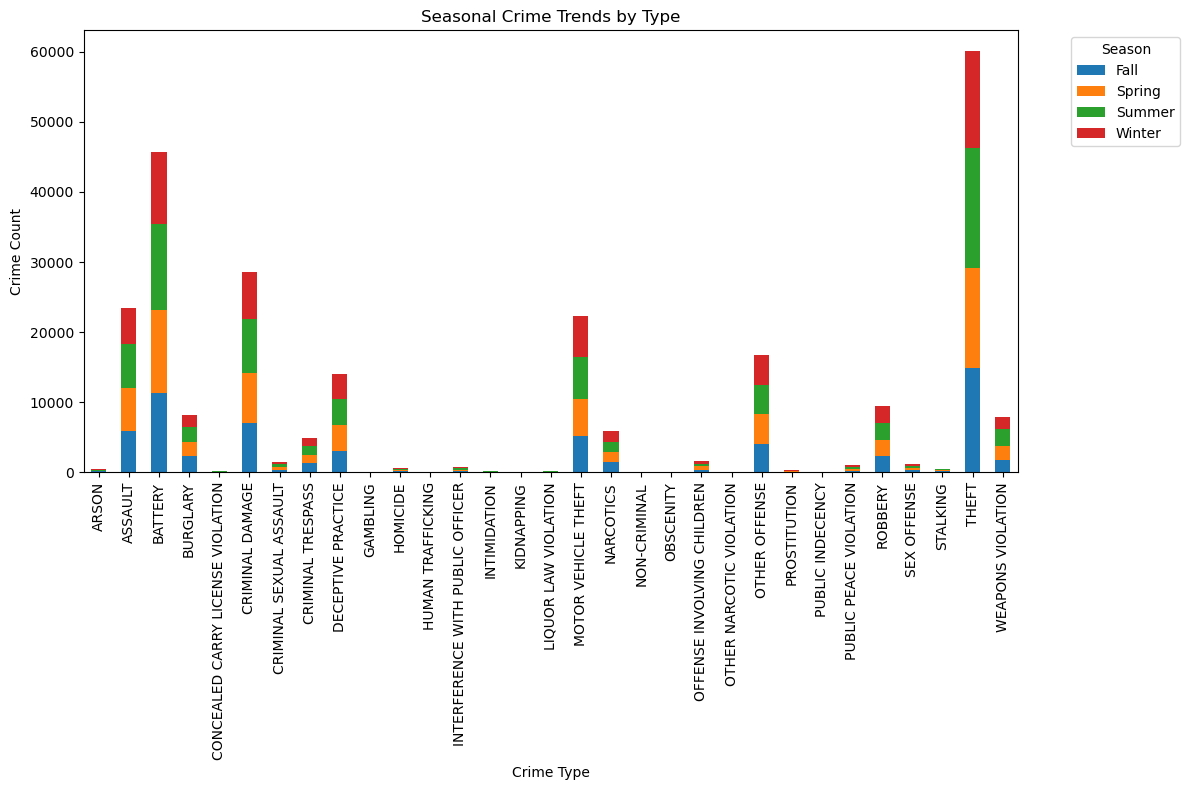

In [4]:
seasonal_trends_pivot.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Seasonal Crime Trends by Type')
plt.ylabel('Crime Count')
plt.xlabel('Crime Type')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Seasonal Crime Trends at CTA Train Locations

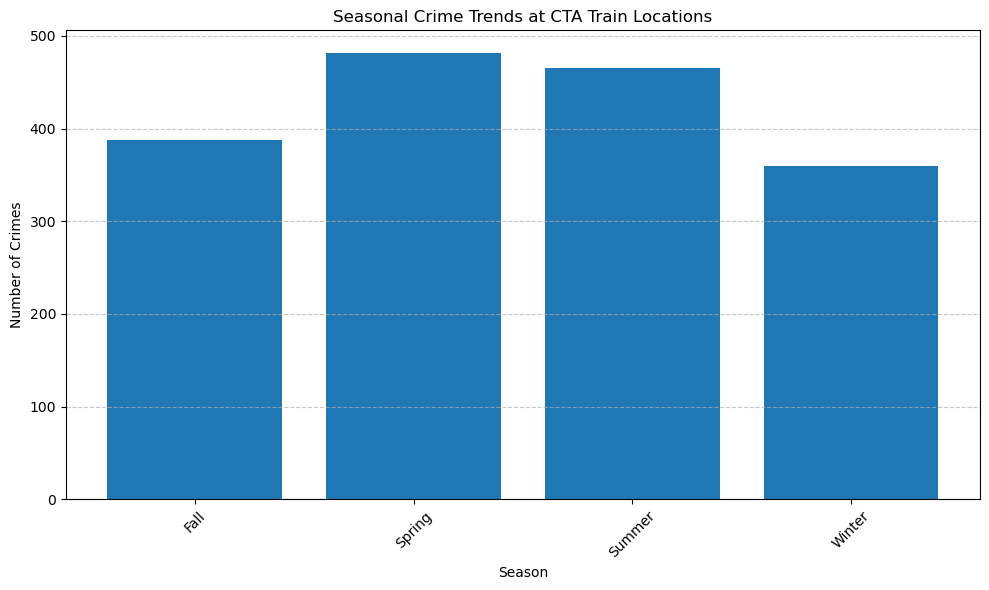

In [6]:
# Clean column names
data.columns = data.columns.str.strip()

# Filter for CTA Train crimes
cta_train_data = data[data['LOCATION DESCRIPTION'].str.contains('CTA TRAIN', case=False, na=False)].copy()

# Convert DATE  OF OCCURRENCE to datetime
cta_train_data['DATE_OF_OCCURRENCE'] = pd.to_datetime(
    cta_train_data['DATE  OF OCCURRENCE'], 
    format='%m/%d/%Y %I:%M:%S %p', 
    errors='coerce'
)

# Extract Month and Map to Seasons
cta_train_data['Month'] = cta_train_data['DATE_OF_OCCURRENCE'].dt.month
cta_train_data['Season'] = cta_train_data['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Group by Season and Count Crimes
seasonal_crime_cta = (
    cta_train_data
    .groupby('Season')
    .size()
    .reset_index(name='Crime Count')
)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(seasonal_crime_cta['Season'], seasonal_crime_cta['Crime Count'])

# Customize the plot
plt.title('Seasonal Crime Trends at CTA Train Locations')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Loading Bigger Dataset

In [7]:
# Load the dataset
data = pd.read_csv('db_one_cleaned.csv')

# Mapping Seasonal Data

In [8]:
# Display column names to verify 'TIME_PERIOD_START' exists
# print("Column names in the dataset:", data.columns)

# Rename the DataFrame correctly to avoid confusion
data['TIME_PERIOD_START'] = pd.to_datetime(data['TIME_PERIOD_START'], errors='coerce')

# Drop rows where 'TIME_PERIOD_START' could not be converted
data = data.dropna(subset=['TIME_PERIOD_START'])

# Define a function to map months to seasons
def map_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the season mapping function
data['Season'] = data['TIME_PERIOD_START'].apply(map_season)

# Group by crime type and season, then count occurrences
seasonal_data = data.groupby(['PRIMARY_TYPE', 'Season']).size().unstack(fill_value=0)

# Ensure the seasonal data has columns for all seasons
seasonal_data = seasonal_data.reindex(columns=['Fall', 'Spring', 'Summer', 'Winter'], fill_value=0)

# Reset index to make PRIMARY_TYPE a column
seasonal_data.reset_index(inplace=True)

print(seasonal_data)

Season             PRIMARY_TYPE  Fall  Spring  Summer  Winter
0                       ASSAULT   410     419     441     398
1                       BATTERY   464     491     479     484
2       CRIMINAL SEXUAL ASSAULT   180     201     217     167
3                      HOMICIDE   430     462     505     445
4                     NON-FATAL     8       7      15       8
5                       ROBBERY   373     408     441     367


# Mapping Seasonal Data

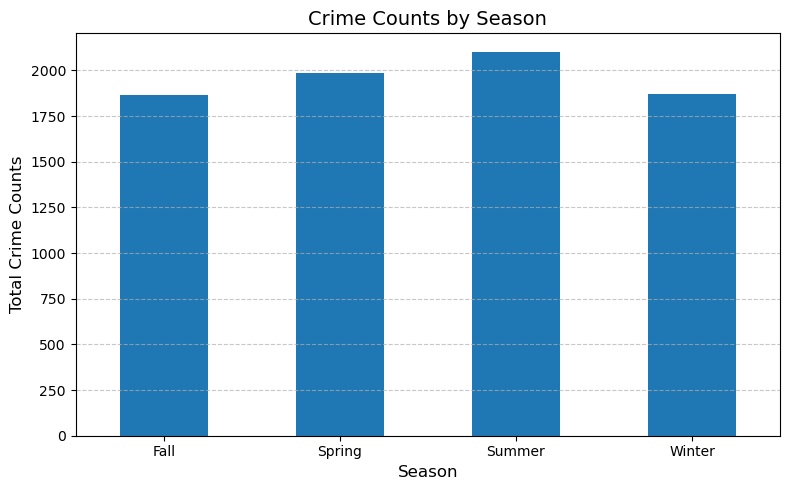

In [9]:
# Aggregate data by season across all crime types
seasonal_totals = seasonal_data[['Fall', 'Spring', 'Summer', 'Winter']].sum()

# Create a bar chart to visualize crime counts by season
plt.figure(figsize=(8, 5))
seasonal_totals.plot(kind='bar')

# Add titles and labels
plt.title("Crime Counts by Season", fontsize=14)
plt.ylabel("Total Crime Counts", fontsize=12)
plt.xlabel("Season", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()


# Distribution of Crimes by Season

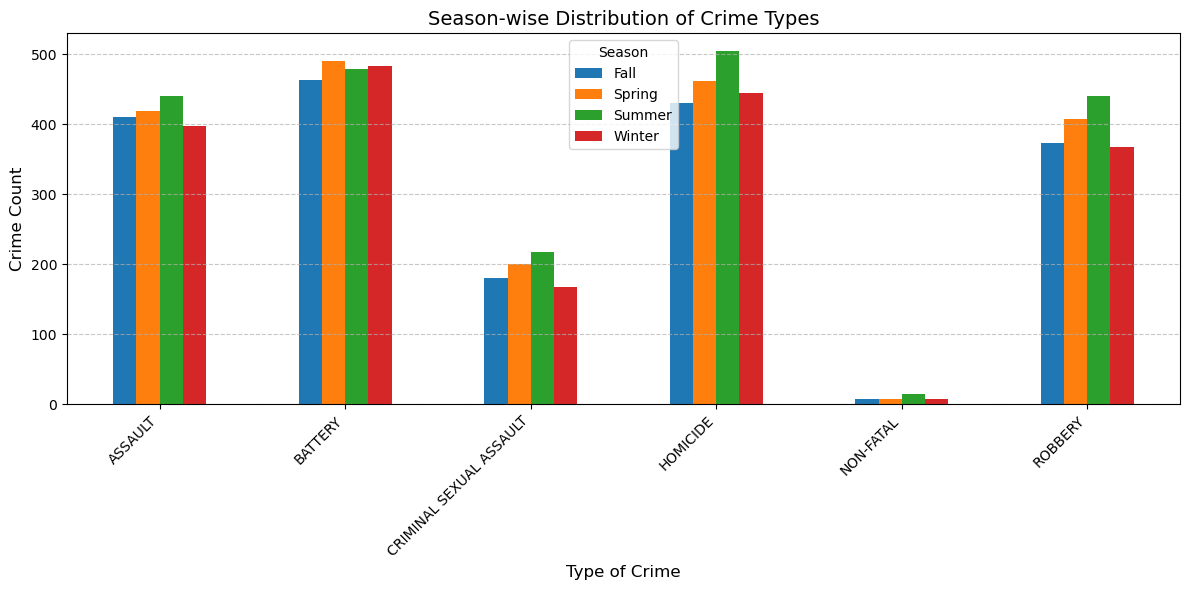

In [10]:
import matplotlib.pyplot as plt

# Prepare data for visualization
crime_season_distribution = data.groupby(['PRIMARY_TYPE', 'Season']).size().unstack(fill_value=0)

# Plot grouped bar chart
crime_season_distribution.plot(kind='bar', figsize=(12, 6))

# Add titles and labels
plt.title("Season-wise Distribution of Crime Types", fontsize=14)
plt.ylabel("Crime Count", fontsize=12)
plt.xlabel("Type of Crime", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Season", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


# Crime Trends Over The Years by Season Plot 

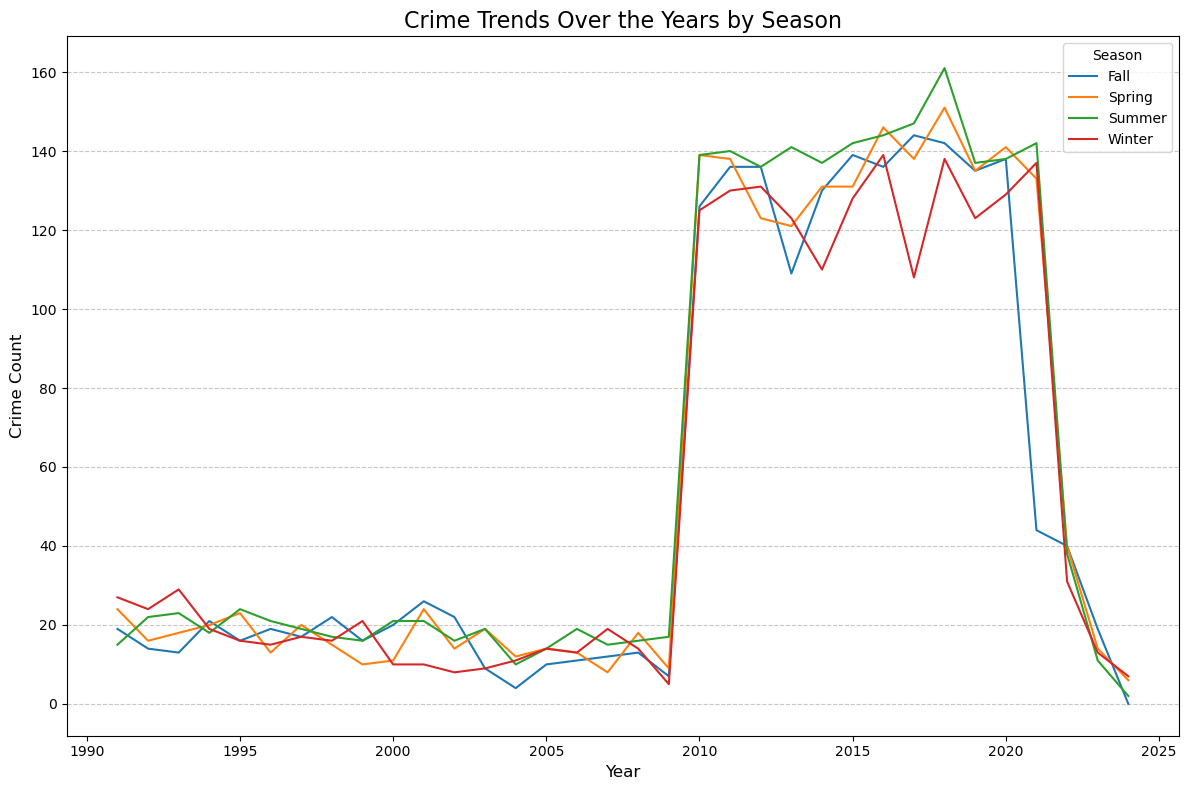

In [11]:
# Ensure 'TIME_PERIOD_START' is in datetime format
data['TIME_PERIOD_START'] = pd.to_datetime(data['TIME_PERIOD_START'], errors='coerce')

# Extract the year from the 'TIME_PERIOD_START' column
data['Year'] = data['TIME_PERIOD_START'].dt.year

# Group data by year and season, and count the occurrences
yearly_seasonal_trends = data.groupby(['Year', 'Season']).size().unstack(fill_value=0)

# Plot line chart for yearly trends of each season
plt.figure(figsize=(12, 8))

for season in ['Fall', 'Spring', 'Summer', 'Winter']:
    plt.plot(yearly_seasonal_trends.index, yearly_seasonal_trends[season], label=season)

# Add titles, labels, and legend
plt.title("Crime Trends Over the Years by Season", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)
plt.legend(title="Season", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()